In [2]:
# Bibliotecas usadas para a análise de dados
import os
import pandas as pd
import mapclassify as mc
import geoplot as gplt
import geopandas as gpd

In [3]:
# Caminho para os arquivos
path_shp = os.path.join(os.getcwd(), 'SHP', 'DF_Malha_Preliminar_2022.shp')
path_xlsx = os.path.join(os.getcwd(), 'TABELA', 'Agregados_preliminares_por_setores_censitarios_DF.xlsx')

In [4]:
# Leitura dos arquivos
df = pd.read_excel(path_xlsx)
gdf = gpd.read_file(path_shp)

<Axes: >

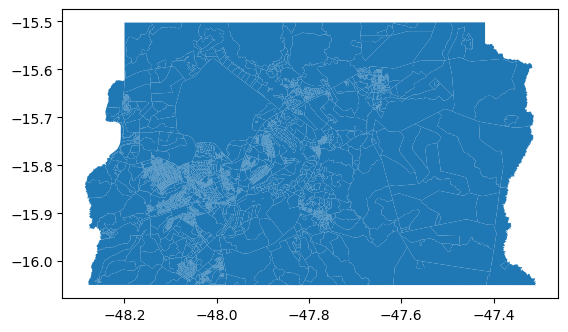

In [5]:
# Visualizar arquivos
gdf.plot()

In [6]:
# Verificar informações
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5184 entries, 0 to 5183
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   CD_SETOR    5184 non-null   object  
 1   AREA_KM2    5184 non-null   float64 
 2   CD_REGIAO   5184 non-null   object  
 3   NM_REGIAO   5184 non-null   object  
 4   CD_UF       5184 non-null   object  
 5   NM_UF       5184 non-null   object  
 6   CD_MUN      5184 non-null   object  
 7   NM_MUN      5184 non-null   object  
 8   CD_DIST     5184 non-null   object  
 9   NM_DIST     5184 non-null   object  
 10  CD_SUBDIST  5184 non-null   object  
 11  NM_SUBDIST  5184 non-null   object  
 12  CD_MICRO    5184 non-null   object  
 13  NM_MICRO    5184 non-null   object  
 14  CD_MESO     5184 non-null   object  
 15  NM_MESO     5184 non-null   object  
 16  CD_RGI      5184 non-null   object  
 17  NM_RGI      5184 non-null   object  
 18  CD_RGINT    5184 non-null   object  
 19

In [7]:
# Verificar as primeiras linhas do arquivo vetorial
gdf.head()

,CD_SETOR,AREA_KM2,CD_REGIAO,NM_REGIAO,CD_UF,NM_UF,CD_MUN,NM_MUN,CD_DIST,NM_DIST,...,NM_MICRO,CD_MESO,NM_MESO,CD_RGI,NM_RGI,CD_RGINT,NM_RGINT,CD_CONCURB,NM_CONCURB,geometry
0,530010805060005P,0.661487,5,Centro-oeste,53,Distrito Federal,5300108,Brasília,530010805,Brasília,...,Brasília,5301,Distrito Federal,530001,Distrito Federal,5301,Distrito Federal,5300108,Brasília/DF,"POLYGON ((-47.88406 -15.78102, -47.88400 -15.7..."
1,530010805060006P,0.030694,5,Centro-oeste,53,Distrito Federal,5300108,Brasília,530010805,Brasília,...,Brasília,5301,Distrito Federal,530001,Distrito Federal,5301,Distrito Federal,5300108,Brasília/DF,"POLYGON ((-47.88411 -15.78290, -47.88411 -15.7..."
2,530010805060007P,0.093268,5,Centro-oeste,53,Distrito Federal,5300108,Brasília,530010805,Brasília,...,Brasília,5301,Distrito Federal,530001,Distrito Federal,5301,Distrito Federal,5300108,Brasília/DF,"POLYGON ((-47.88069 -15.77929, -47.88066 -15.7..."
3,530010805060008P,0.060949,5,Centro-oeste,53,Distrito Federal,5300108,Brasília,530010805,Brasília,...,Brasília,5301,Distrito Federal,530001,Distrito Federal,5301,Distrito Federal,5300108,Brasília/DF,"POLYGON ((-47.88077 -15.77818, -47.88069 -15.7..."
4,530010805060009P,0.057290,5,Centro-oeste,53,Distrito Federal,5300108,Brasília,530010805,Brasília,...,Brasília,5301,Distrito Federal,530001,Distrito Federal,5301,Distrito Federal,5300108,Brasília/DF,"POLYGON ((-47.88589 -15.78030, -47.88646 -15.7..."


In [8]:
# Verificar as primeiras linhas do arquivo tabular
df.head()

,CD_SETOR,AREA_KM2,CD_REGIAO,NM_REGIAO,CD_UF,NM_UF,CD_MUN,NM_MUN,CD_DIST,NM_DIST,...,NM_RGINT,CD_CONCURB,NM_CONCURB,v0001,v0002,v0003,v0004,v0005,v0006,v0007
0,530010805060005P,0.661487,5,Centro-oeste,53,Distrito Federal,5300108,Brasília,530010805,Brasília,...,Distrito Federal,5300108,Brasília/DF,132,274,274,0,2.588235,5.882353,51
1,530010805060006P,0.030694,5,Centro-oeste,53,Distrito Federal,5300108,Brasília,530010805,Brasília,...,Distrito Federal,5300108,Brasília/DF,637,192,192,0,3.406417,3.743316,187
2,530010805060007P,0.093268,5,Centro-oeste,53,Distrito Federal,5300108,Brasília,530010805,Brasília,...,Distrito Federal,5300108,Brasília/DF,743,217,217,0,3.642157,4.901961,204
3,530010805060008P,0.060949,5,Centro-oeste,53,Distrito Federal,5300108,Brasília,530010805,Brasília,...,Distrito Federal,5300108,Brasília/DF,715,246,246,0,3.264840,2.283105,219
4,530010805060009P,0.057290,5,Centro-oeste,53,Distrito Federal,5300108,Brasília,530010805,Brasília,...,Distrito Federal,5300108,Brasília/DF,581,297,297,0,2.296443,4.743083,253


In [9]:
# Merge entre os arquivos vetorial e tabular 
# Vetorial: Setores Censitários do Censo 2022
# Tabular: Dados Agregados preliminares por setores censitarios DF
marge = gdf.merge(df[['CD_SETOR','v0001', 'v0002', 'v0003', 'v0004', 'v0005', 'v0006', 'v0007']], on='CD_SETOR')
marge

,CD_SETOR,AREA_KM2,CD_REGIAO,NM_REGIAO,CD_UF,NM_UF,CD_MUN,NM_MUN,CD_DIST,NM_DIST,...,CD_CONCURB,NM_CONCURB,geometry,v0001,v0002,v0003,v0004,v0005,v0006,v0007
0,530010805060005P,0.661487,5,Centro-oeste,53,Distrito Federal,5300108,Brasília,530010805,Brasília,...,5300108,Brasília/DF,"POLYGON ((-47.88406 -15.78102, -47.88400 -15.7...",132,274,274,0,2.588235,5.882353,51
1,530010805060006P,0.030694,5,Centro-oeste,53,Distrito Federal,5300108,Brasília,530010805,Brasília,...,5300108,Brasília/DF,"POLYGON ((-47.88411 -15.78290, -47.88411 -15.7...",637,192,192,0,3.406417,3.743316,187
2,530010805060007P,0.093268,5,Centro-oeste,53,Distrito Federal,5300108,Brasília,530010805,Brasília,...,5300108,Brasília/DF,"POLYGON ((-47.88069 -15.77929, -47.88066 -15.7...",743,217,217,0,3.642157,4.901961,204
3,530010805060008P,0.060949,5,Centro-oeste,53,Distrito Federal,5300108,Brasília,530010805,Brasília,...,5300108,Brasília/DF,"POLYGON ((-47.88077 -15.77818, -47.88069 -15.7...",715,246,246,0,3.264840,2.283105,219
4,530010805060009P,0.057290,5,Centro-oeste,53,Distrito Federal,5300108,Brasília,530010805,Brasília,...,5300108,Brasília/DF,"POLYGON ((-47.88589 -15.78030, -47.88646 -15.7...",581,297,297,0,2.296443,4.743083,253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5179,530010805440135P,1.967408,5,Centro-oeste,53,Distrito Federal,5300108,Brasília,530010805,Brasília,...,5300108,Brasília/DF,"POLYGON ((-47.91769 -15.60060, -47.91682 -15.5...",129,57,57,0,3.071429,0.000000,42
5180,530010805440136P,3.246959,5,Centro-oeste,53,Distrito Federal,5300108,Brasília,530010805,Brasília,...,5300108,Brasília/DF,"POLYGON ((-47.91525 -15.59060, -47.91534 -15.5...",531,216,216,0,3.339623,0.000000,159
5181,530010805440137P,2.016493,5,Centro-oeste,53,Distrito Federal,5300108,Brasília,530010805,Brasília,...,5300108,Brasília/DF,"POLYGON ((-47.97623 -15.57617, -47.97642 -15.5...",149,88,88,0,2.811321,1.886792,53
5182,530010805440138P,2.689388,5,Centro-oeste,53,Distrito Federal,5300108,Brasília,530010805,Brasília,...,5300108,Brasília/DF,"POLYGON ((-47.98788 -15.59058, -47.97642 -15.5...",241,115,115,0,2.770115,8.045977,87


In [10]:
# Verificar as primeiras linhas de todos os arquivos para verificar se o merge foi realizado corretamente
print(f'Setor Censitário nº linhas:{len(gdf)} \
    \nTabela nº linhas:{len(df)} \
        \nMarge nº linhas:{len(marge)}')


Setor Censitário nº linhas:5184     
Tabela nº linhas:5184         
Marge nº linhas:5184


In [ ]:
# Exportar para SHP o resultado da marge -> DF_Malha_Preliminar_2022_Agregados.shp
# marge.to_file(os.path.join(os.getcwd(), 'SHP', 'DF_Malha_Preliminar_2022_Agregados.shp'))

<Axes: >

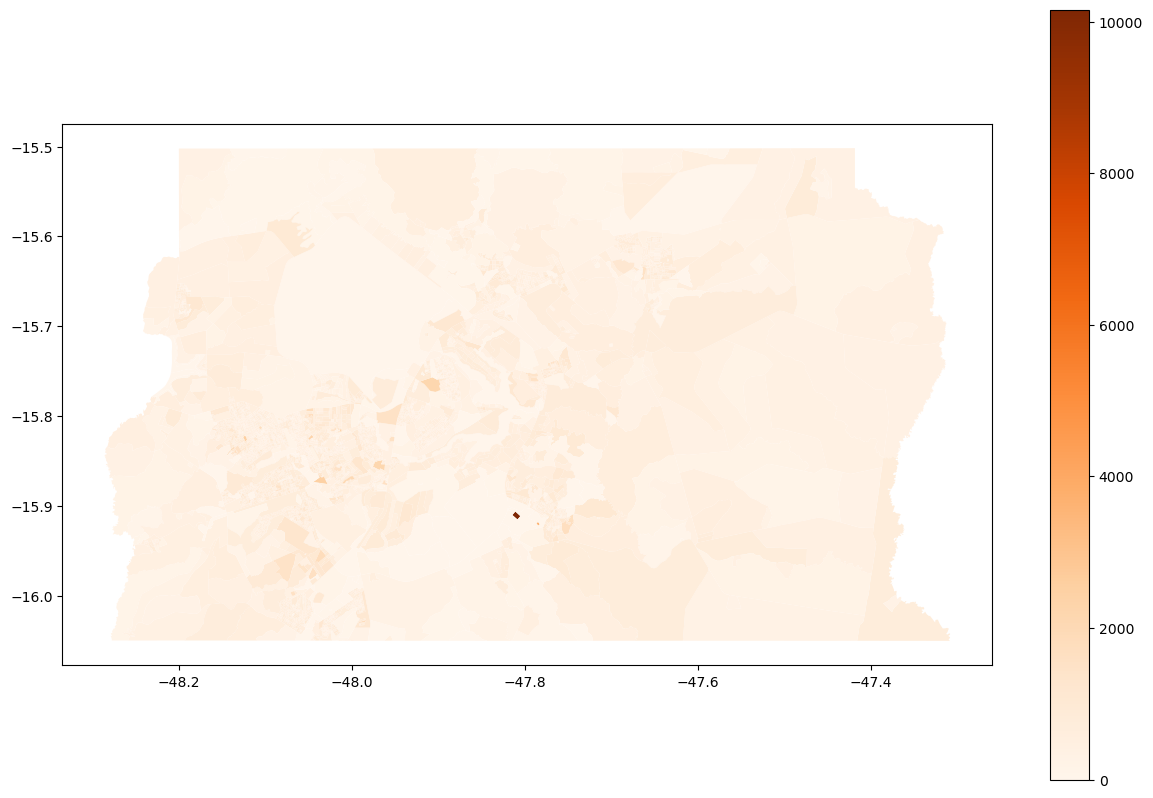

In [11]:
# Plotar o mapa com a variável v0001 que é a população total por setor censitário
marge.plot(column='v0001', cmap='Oranges', legend=True, figsize=(15, 10))

In [23]:
scheme = mc.FisherJenks(marge['v0001'], k=5)
scheme.get_legend_classes()

mapping = dict([(i, s) for i, s in enumerate(scheme.get_legend_classes())])

mapping

c:\Users\rogerio.siqueira\AppData\Local\anaconda3\envs\geo_py311\Lib\site-packages\mapclassify\classifiers.py:1860: UserWarning: Numba not installed. Using slow pure python version.
  warnings.warn(


{0: '[    0.00,   346.00]',
 1: '(  346.00,   598.00]',
 2: '(  598.00,   917.00]',
 3: '(  917.00,  3586.00]',
 4: '( 3586.00, 10163.00]'}

In [24]:

def replace_legend_items(legend, mapping):
    """
    Substitui os itens de legenda de um gráfico de acordo com um mapeamento fornecido.

    Parâmetros:
    legend (matplotlib.legend.Legend): O objeto de legenda do gráfico.
    mapping (dict): Um dicionário que mapeia os itens de legenda originais para os itens de legenda substitutos.

    Exemplo:
    legend = ax.legend()
    mapping = {'Item Original': 'Item Substituto'}
    replace_legend_items(legend, mapping)
    """
    for txt in legend.texts:
        for k, v in mapping.items():
            if txt.get_text() == str(k):
                txt.set_text(v)

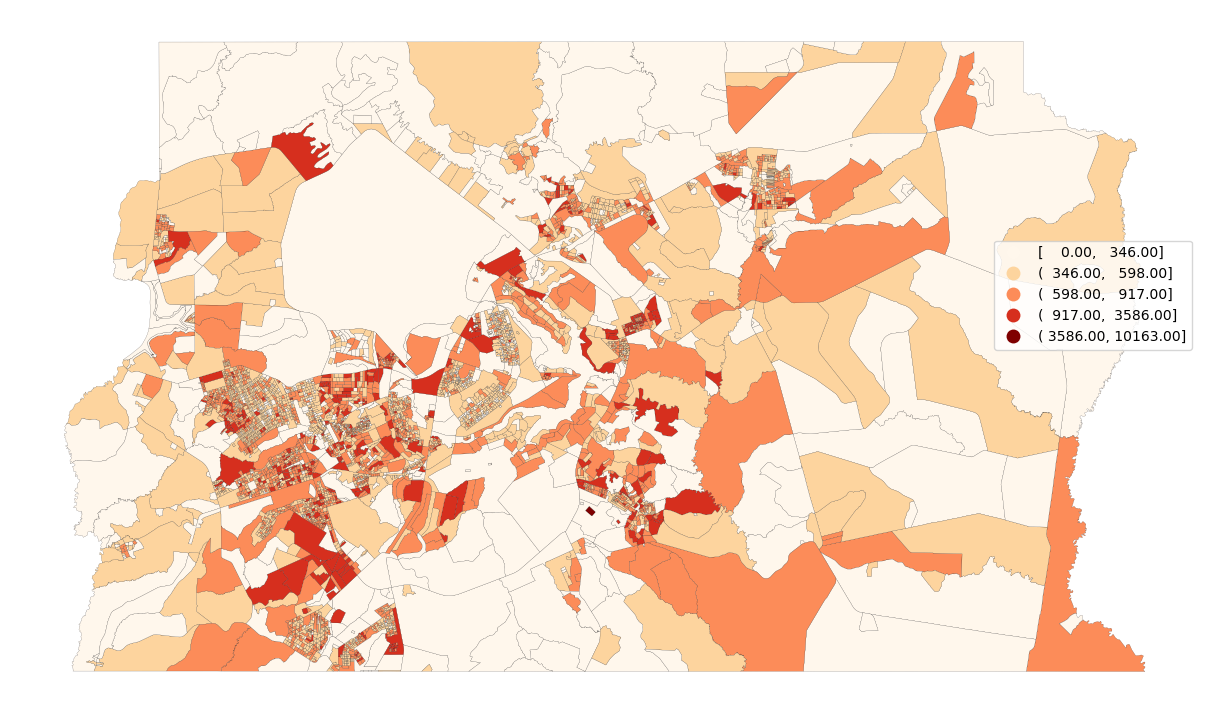

In [53]:
# Plotar o mapa com a variável v0001 que é a população total por setor censitário
ax = marge.assign(cl=scheme.yb).plot(
    figsize=(16, 9),
    column="cl",
    categorical=True,
    k=5,
    cmap="OrRd",
    linewidth=0.1,
    edgecolor="black",
    legend=True,
    legend_kwds={"loc": "lower right", "bbox_to_anchor": (1, 0.5)},
)
ax.set_axis_off()
replace_legend_items(ax.get_legend(), mapping)

FATIAR ESTRATOS
 - Criar um arquivo vetorial para cada geometria de estrato

In [10]:
estratos_path = os.path.join(os.getcwd(),'SHP','estratos_pdad_rural_rev02.shp')

In [ ]:
estratos_path

In [11]:
gdf_estrato = gpd.read_file(estratos_path)

In [12]:
lista_estratos = gdf_estrato['estrato_V2'].unique().tolist()

In [13]:
lista_estratos

['Características Urbanas - Sul',
 'Agricultura Empresarial - Sul',
 'Agricultura Familiar - Sul',
 'Características Urbanas - Oeste',
 'Agricultura Empresarial - Oeste',
 'Agricultura Familiar - Oeste',
 'Assentamento/ Agrovila - Oeste',
 'Agricultura Empresarial - Norte',
 'Características Urbanas - Norte',
 'Agricultura Familiar - Norte',
 'Assentamento/Agrovila - Norte',
 'Características Urbanas - Leste',
 'Agricultura Empresarial - Leste',
 'Assentamento/ Agrovila - Leste',
 'Agricultura Familiar - Leste',
 'Agricultura Familiar - Central Adjacente II',
 'Características Urbanas - Central Adjacente II',
 'Características Urbanas - Central Adjacente I',
 'Assentamento/ Agrovila - Sul',
 'Agricultura Familiar - Central Adjacente I',
 'Assentamento/Agrovila - Central Adjacente I']

In [113]:
for estrato in lista_estratos:
    estrato_separado = gdf_estrato[gdf_estrato['estrato_V2'] == estrato]
    estrato_corrigido = estrato.replace('/ ',' ').replace('/',' ')
    
    # Salvar os arquivos separados por estrato
    # estrato_separado.to_file(os.path.join(os.getcwd(), 'SHP', 'ESTRATOS SEPARADOS',f'{estrato_corrigido}.shp'))

            CD_SETOR                                         NM_SIT  \
0    530010805070162             Área Rural (exclusive aglomerados)   
6    530010805070169             Área Rural (exclusive aglomerados)   
9    530010805070174             Área Rural (exclusive aglomerados)   
10   530010805070178   Área Urbana de Alta Densidade de Edificações   
11   530010805070208             Área Rural (exclusive aglomerados)   
15   530010805070217   Área Urbana de Alta Densidade de Edificações   
17   530010805070219             Área Rural (exclusive aglomerados)   
18   530010805070223             Área Rural (exclusive aglomerados)   
20   530010805070229  Área Urbana de Baixa Densidade de Edificações   
21   530010805070230                                       Lugarejo   
22   530010805070231                                       Lugarejo   
23   530010805070243  Área Urbana de Baixa Densidade de Edificações   
24   530010805070244  Área Urbana de Baixa Densidade de Edificações   
25   5

In [15]:
# Caminho dos estratos separados da PDAD com os dados do Censo 2022
# Atualizar o caminho para os estratos separados da PDAD
files = os.listdir(os.path.join(os.getcwd(), 'SHP','ESTRATOS SEPARADOS - CENSO 2022')) # Já está lendo os estrados atualizados com os limites do setor censitário de 2022

In [16]:
# Lista com os arquivos .shp
shp_files = [file for file in files if file.endswith('.shp')]
shp_files

['Agricultura Empresarial - Leste.shp',
 'Agricultura Empresarial - Norte.shp',
 'Agricultura Empresarial - Oeste.shp',
 'Agricultura Empresarial - Sul.shp',
 'Agricultura Familiar - Central Adjacente I.shp',
 'Agricultura Familiar - Central Adjacente II.shp',
 'Agricultura Familiar - Leste.shp',
 'Agricultura Familiar - Norte.shp',
 'Agricultura Familiar - Oeste.shp',
 'Agricultura Familiar - Sul.shp',
 'Assentamento Agrovila - Central Adjacente I.shp',
 'Assentamento Agrovila - Leste.shp',
 'Assentamento Agrovila - Norte.shp',
 'Assentamento Agrovila - Oeste.shp',
 'Assentamento Agrovila - Sul.shp',
 'Características Urbanas - Central Adjacente I.shp',
 'Características Urbanas - Central Adjacente II.shp',
 'Características Urbanas - Leste.shp',
 'Características Urbanas - Norte.shp',
 'Características Urbanas - Oeste.shp',
 'Características Urbanas - Sul.shp']

In [17]:
# No total são 21 estratos usados na PDAD Rural
len(shp_files)

21

FUNÇÕES

In [106]:

def verificar_colunas(file, gdf):
    """
    Verifica se um conjunto de colunas existe em um DataFrame.

    Parâmetros:
    file (str): O nome do arquivo sendo verificado.
    gdf (pandas.DataFrame): O DataFrame para verificar as colunas.

    Retorna:
    bool: True se todas as colunas estiverem presentes, False caso contrário.
    """

    # Lista de colunas para verificar
    colunas_para_verificar = ['v0001', 'v0002', 'v0003', 'v0004', 'v0005', 'v0006', 'v0007']

    # Verificar se todas as colunas na lista existem no DataFrame
    if set(colunas_para_verificar).issubset(gdf.columns):
        return True
    else:
        print(f'Faltam colunas no arquivo {file}')
        return False


In [107]:
def selecao_setorCensitario_por_estrato(file, gdf, marge):
    """
    Seleciona os setores censitários que estão dentro de um determinado estrato.

    Parâmetros:
    - file (str): O caminho do arquivo shapefile.
    - gdf (GeoDataFrame): O GeoDataFrame contendo os setores censitários.
    - marge (GeoDataFrame): O GeoDataFrame contendo o estrato.

    Retorna:
    - selecao (GeoDataFrame): O GeoDataFrame contendo os setores censitários que estão dentro do estrato.

    Observações:
    - A função realiza as seguintes etapas:
        1. Converte o sistema de coordenadas do estrato e dos setores censitários para EPSG 31983.
        2. Aplica um buffer negativo de 1 metro na geometria dos setores censitários.
        3. Verifica se existem geometrias válidas tanto no estrato quanto nos setores censitários.
        4. Seleciona os setores censitários que estão dentro do estrato.
        5. Retorna o GeoDataFrame resultante da seleção.

    Exemplo de uso:
    ```
    file = '/caminho/do/arquivo.shp'
    gdf = gpd.read_file(file)
    marge = gpd.read_file('/caminho/do/estrato.shp')

    selecao = selecao_setorCensitario_por_estrato(file, gdf, marge)
    ```
    """
    marge = marge.to_crs(epsg=31983)
    
    gdf = gdf.to_crs(epsg=31983)
    # Buffer de negativo de 1 metro
    gdf['geometry'] = gdf.geometry.buffer(-1)
    
    if marge['geometry'].notna().any() and gdf['geometry'].notna().any():

        #Seleção dos setores censitários que estão dentro do estrato
        selecao = marge[marge.intersects(gdf.unary_union)]
        
        return selecao
    else:
        print(f'Todas as geometrias no arquivo {file.replace(".shp", "")} são nulas.')

In [108]:
def criar_df_populacao_total(df, file, gdf):
    """
    Função que adiciona a população total de um arquivo shapefile ao dataframe df.

    Parâmetros:
    - df: DataFrame - O dataframe onde a população total será adicionada.
    - file: str - O nome do arquivo shapefile.
    - gdf: GeoDataFrame - O GeoDataFrame contendo os dados do shapefile.

    Retorna:
    - DataFrame - O dataframe atualizado com a população total adicionada.

    Exemplo de uso:
    df = criar_df_populacao_total(df, 'arquivo.shp', gdf)
    """

    df.loc[file.replace('.shp',''), 'POPULAÇÃO'] = gdf['v0001'].sum()
       
    return df

In [1]:
def organizar_df_populacao_total(df):
     """
     Organiza um DataFrame contendo dados de população total por estrato.

     Parâmetros:
     - df (pandas.DataFrame): O DataFrame contendo os dados de população por estrato.

     Retorna:
     - df_copy (pandas.DataFrame): O DataFrame organizado com a adição da linha 'TOTAL' contendo a soma da população total.

     Exemplo de uso:
     >>> df = pd.DataFrame({'index': ['A', 'B', 'C'], 'POPULAÇÃO': [100, 200, 300]})
     >>> df_organizado = organizar_df_populacao_total(df)
     >>> print(df_organizado)
         ESTRATOS  POPULAÇÃO
     0        A        100
     1        B        200
     2        C        300
     3    TOTAL        600
     """
     df_copy = df.copy()
     
     total = df_copy['POPULAÇÃO'].sum()
     df_copy.loc['TOTAL','POPULAÇÃO'] = total
     df_copy = df_copy.reset_index()
     df_copy = df_copy.rename(columns={'index':'ESTRATOS'})
     
     return df_copy


In [110]:
# Inicialize o DataFrame fora do loop
df_populacao_total = pd.DataFrame()

for file in shp_files:
    gdf = gpd.read_file(os.path.join(os.getcwd(), 'SHP','ESTRATOS SEPARADOS - CENSO 2022', file))
    
    #Verificar se as colunas de interesse estão presentes
    if verificar_colunas(file, gdf) is True:
        
        #Checar a interseção
        selecao_setorCensitario_por_estrato(file, gdf, marge)
        
        #Criar DataFrame com a população total  
        df_populacao_total = criar_df_populacao_total(df_populacao_total, file, gdf)
        
        #Organizar o DataFrame
        df_total_populacao_organizado = organizar_df_populacao_total(df_populacao_total)
    else:
        print(f'Faltam colunas no arquivo {file}')
    
df_total_populacao_organizado

,ESTRATOS,POPULAÇÃO
0,Agricultura Empresarial - Leste,10951.0
1,Agricultura Empresarial - Norte,6892.0
2,Agricultura Empresarial - Oeste,5224.0
3,Agricultura Empresarial - Sul,10052.0
4,Agricultura Familiar - Central Adjacente I,1540.0
5,Agricultura Familiar - Central Adjacente II,2526.0
6,Agricultura Familiar - Leste,3170.0
7,Agricultura Familiar - Norte,13234.0
8,Agricultura Familiar - Oeste,15100.0
9,Agricultura Familiar - Sul,2453.0


In [102]:
df_total_populacao_organizado.to_excel(os.path.join(os.getcwd(), 'TABELA', 'Populacao_por_estrato_setor_censitario_2022.xlsx'), index=False)